### Clase 1: Algoritmos de Clasificación con GridSearchCV
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.shape

(768, 9)

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Distribución de clases
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Separamos los datos para entrenar los modelos
from sklearn.model_selection import train_test_split
# Preparación de datos para entrenamiento
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# Escalado (lo usaremos después para KNN y SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

def evaluar_modelo(model, X_test, y_test, nombre="Modelo"):
    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    print(f"\n✅ Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precisión (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nReporte por clase:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Resultados para Decision Tree
Accuracy: 0.7012987012987013
Precisión (macro): 0.6793583641812092
Recall (macro): 0.6868686868686869
F1-score (macro): 0.6819324712643677

Reporte por clase:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154



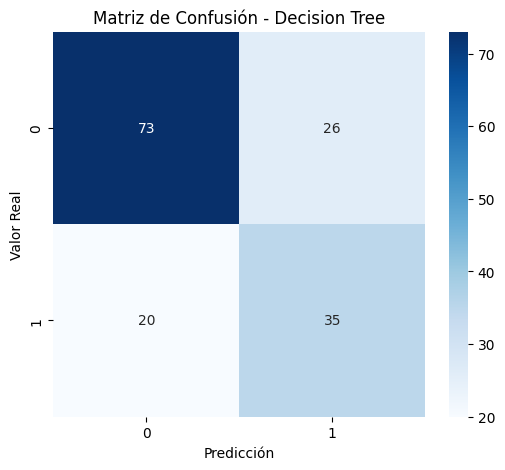

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir modelo base
dt = DecisionTreeClassifier(random_state=42)

# Espacio de hiperparámetros
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# RandomizedSearch
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=20,
    cv=3,
    random_state=42,
    n_jobs=4,
    verbose=1
)

# Entrenar
random_search_dt.fit(X_train, y_train)

# Evaluar
evaluar_modelo(random_search_dt.best_estimator_, X_test, y_test, "Decision Tree")


Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Resultados para Random Forest (RandomizedSearch)
Accuracy: 0.7597402597402597
Precisión (macro): 0.7383333333333333
Recall (macro): 0.7363636363636363
F1-score (macro): 0.7373104052371952

Reporte por clase:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



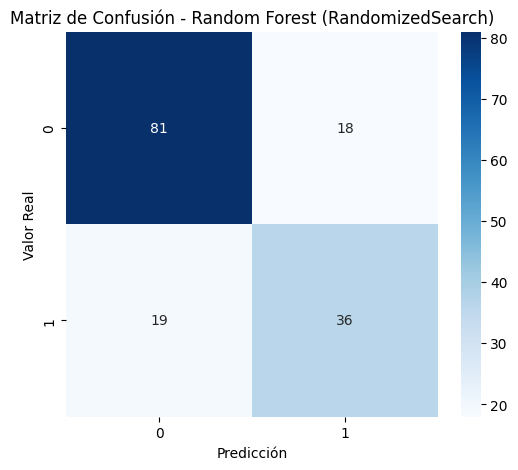

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir modelo base
rf = RandomForestClassifier(random_state=42)

# Espacio de hiperparámetros (distribuciones en vez de listas cerradas)
param_dist_rf = {
    'n_estimators': randint(50, 1000),       # nº de árboles aleatorios entre 50 y 200
    'max_depth': randint(5, 30),           # profundidad entre 5 y 15
    'min_samples_split': randint(2, 20),   # mínimo de muestras para dividir nodo
    'min_samples_leaf': randint(1, 10)      # mínimo de muestras en hoja
}

# RandomizedSearch
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,          # número de combinaciones aleatorias a probar
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring="accuracy"  # puedes cambiar a 'f1', 'roc_auc', etc. si prefieres
)

# Entrenar
random_search_rf.fit(X_train, y_train)

# Evaluar
evaluar_modelo(random_search_rf.best_estimator_, X_test, y_test, "Random Forest (RandomizedSearch)")
